In [1]:
# Review all the figures and tables that you generated in this assignment. 
# Write at least three observations or inferences that can be made from the data. 
# Include these observations at the top of your notebook.

# Observations 
# 1. The mice studied throughout the data set were just about evenly split between male and female. This allowed us to elimate gender as a potential bias in the results of the regimens. This is shown in the pie plots below.
# 2. After looking over the charts produced from this data it is fairly obvious that two treatments reduced the size of the tumors greater then the rest. The two treatments were Ramicane and Capomulin
# 3. 

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Starter_Code/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "Starter_Code/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = mouse_metadata.merge(study_results)

# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# display the # of unique mice IDs 
mouse_ID = mouse_study_df['Mouse ID']
print(mouse_ID.unique())
unique_mouse_IDs = mouse_ID.unique()
print(len(unique_mouse_IDs))

['k403' 's185' 'x401' 'm601' 'g791' 's508' 'f966' 'm546' 'z578' 'j913'
 'u364' 'n364' 'y793' 'r554' 'm957' 'c758' 't565' 'a644' 'i177' 'j989'
 'i738' 'a520' 'w914' 'r811' 'g288' 'i334' 'q610' 'd251' 'l897' 'c458'
 'b742' 'b128' 'j246' 'a411' 'j119' 'w150' 'v923' 'g316' 's710' 'l509'
 'r944' 'e662' 'u196' 'q597' 'a444' 'i557' 'r921' 'w678' 'y449' 'a203'
 'a251' 'a262' 'a275' 'a366' 'a401' 'a457' 'a492' 'a577' 'a685' 'a699'
 'a788' 'a818' 'a897' 'a963' 'b313' 'b447' 'b487' 'b559' 'b759' 'b879'
 'c139' 'c264' 'c282' 'c302' 'c326' 'c402' 'c559' 'c580' 'c757' 'c766'
 'c819' 'c832' 'c895' 'c927' 'd133' 'd164' 'd474' 'e213' 'e227' 'e291'
 'e476' 'e584' 'f129' 'f234' 'f278' 'f345' 'f394' 'f436' 'f545' 'f932'
 'f993' 'g107' 'g296' 'g497' 'g558' 'g570' 'g867' 'g989' 'h246' 'h333'
 'h428' 'h531' 'i386' 'i477' 'i635' 'i669' 'i901' 'j235' 'j296' 'j365'
 'j755' 'j984' 'k210' 'k382' 'k483' 'k510' 'k603' 'k754' 'k804' 'k862'
 'k894' 'l215' 'l264' 'l471' 'l490' 'l558' 'l661' 'l700' 'l725' 'l733'
 'l872

In [4]:
# checkk for any mouse ids with duplicate timestamps
duplicateRows = mouse_study_df[mouse_study_df.duplicated(['Mouse ID', 'Timepoint'],keep=False)]
duplicateRows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
duplicateId = mouse_study_df[mouse_study_df['Mouse ID'] == 'g989']
duplicateId

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# remove duplicated stuff 
# cleaned_df = mouse_study_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
cleaned_df = mouse_study_df[mouse_study_df['Mouse ID']!='g989']
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# display the new # of unique mice IDs 
new_mouse_ID = cleaned_df['Mouse ID']
print(new_mouse_ID.unique())
new_unique_mouse_IDs = new_mouse_ID.unique()
print(len(new_unique_mouse_IDs))

['k403' 's185' 'x401' 'm601' 'g791' 's508' 'f966' 'm546' 'z578' 'j913'
 'u364' 'n364' 'y793' 'r554' 'm957' 'c758' 't565' 'a644' 'i177' 'j989'
 'i738' 'a520' 'w914' 'r811' 'g288' 'i334' 'q610' 'd251' 'l897' 'c458'
 'b742' 'b128' 'j246' 'a411' 'j119' 'w150' 'v923' 'g316' 's710' 'l509'
 'r944' 'e662' 'u196' 'q597' 'a444' 'i557' 'r921' 'w678' 'y449' 'a203'
 'a251' 'a262' 'a275' 'a366' 'a401' 'a457' 'a492' 'a577' 'a685' 'a699'
 'a788' 'a818' 'a897' 'a963' 'b313' 'b447' 'b487' 'b559' 'b759' 'b879'
 'c139' 'c264' 'c282' 'c302' 'c326' 'c402' 'c559' 'c580' 'c757' 'c766'
 'c819' 'c832' 'c895' 'c927' 'd133' 'd164' 'd474' 'e213' 'e227' 'e291'
 'e476' 'e584' 'f129' 'f234' 'f278' 'f345' 'f394' 'f436' 'f545' 'f932'
 'f993' 'g107' 'g296' 'g497' 'g558' 'g570' 'g867' 'h246' 'h333' 'h428'
 'h531' 'i386' 'i477' 'i635' 'i669' 'i901' 'j235' 'j296' 'j365' 'j755'
 'j984' 'k210' 'k382' 'k483' 'k510' 'k603' 'k754' 'k804' 'k862' 'k894'
 'l215' 'l264' 'l471' 'l490' 'l558' 'l661' 'l700' 'l725' 'l733' 'l872'
 'm133

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
    # mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Assemble the resulting series into a single summary DataFrame.
dr_mean = cleaned_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]

dr_median = cleaned_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]

dr_variance = cleaned_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]

dr_std = cleaned_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]

dr_sem = cleaned_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]



In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
# tumor_vol_df= cleaned_df["Tumor Volume (mm3)"]
# tumor_vol_agg=cleaned_df.agg(["mean","median","var","std","sem"])
# tumor_vol_agg

# tumor_vol_agg = cleaned_df.groupby('Drug Regimen').agg(["mean","median", "var","std","sem"])["Tumor Volume (mm3)"]
tumor_vol_agg = cleaned_df.groupby('Drug Regimen').agg({"Tumor Volume (mm3)": ["mean","median", "var","std","sem"]})
tumor_vol_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

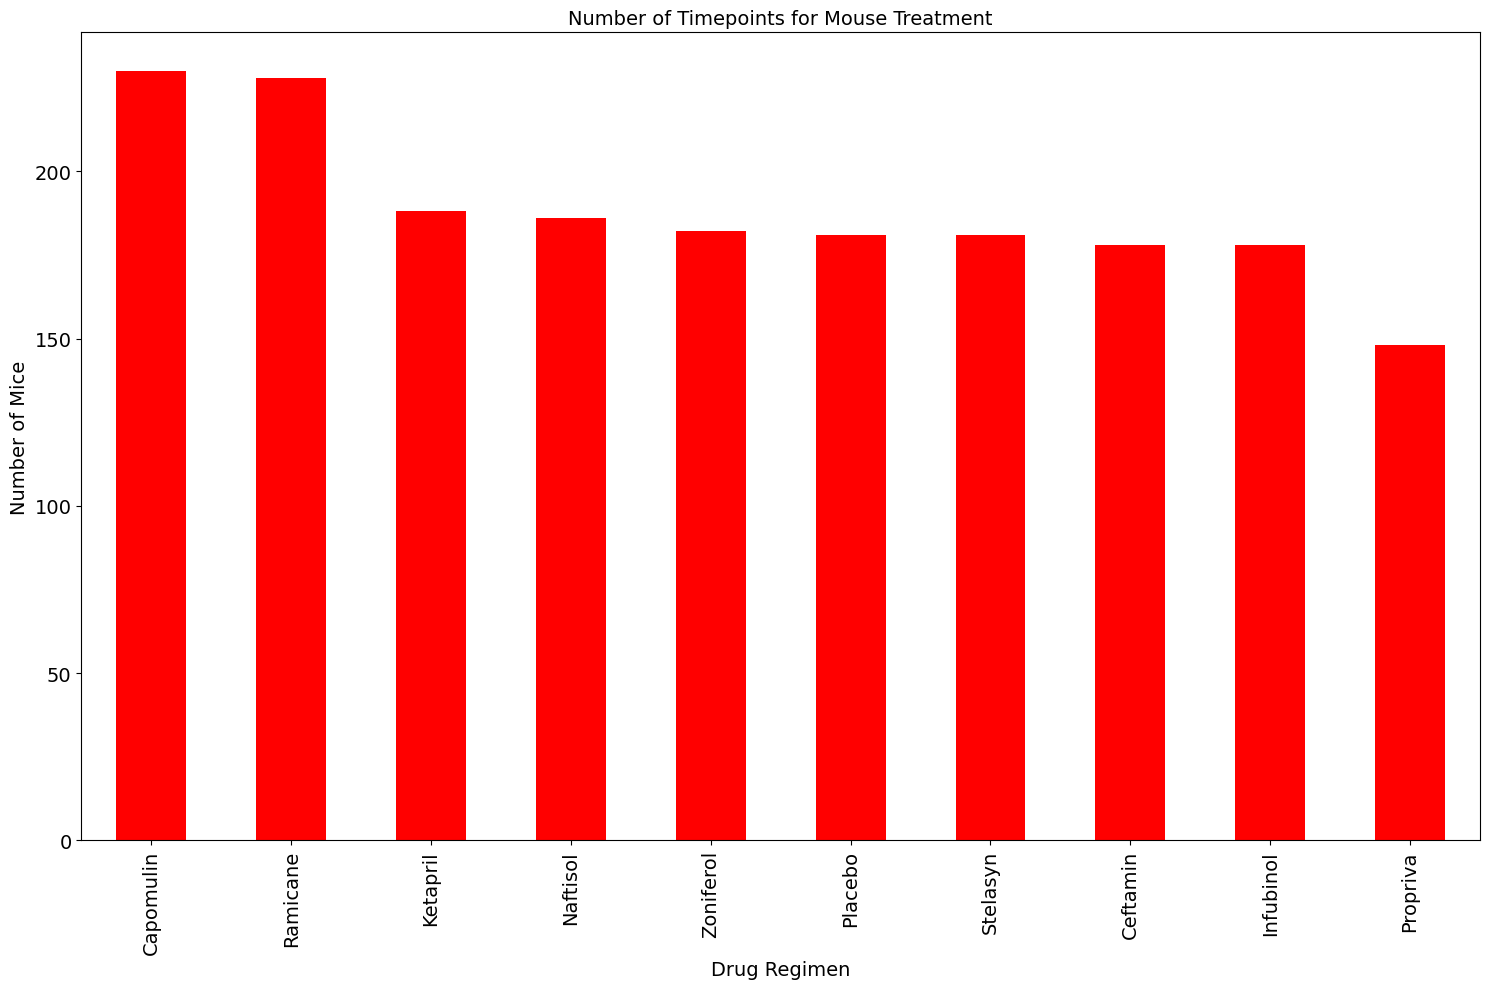

In [18]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.


time_points_per_reg =cleaned_df.groupby(["Drug Regimen"]).count()["Mouse ID"].sort_values(ascending=False) 


plot_pandas = time_points_per_reg.plot.bar(figsize=(15,10), color='red',fontsize = 14)
# time_points_per_reg
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Mice",fontsize = 14)
plt.title("Number of Timepoints for Mouse Treatment",fontsize = 14)

plt.tight_layout()
plt.show()



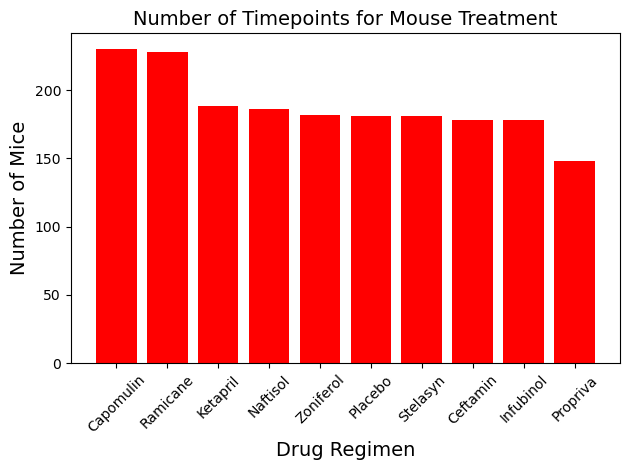

In [19]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# print(time_points_per_reg.array)
labels = time_points_per_reg.index
values = time_points_per_reg.array

# create and select figure 
barfig = plt.figure(0)

# plot data
plt.bar(labels, values, color='red')

# titles, axes titles, making it look good
plt.xticks(rotation=45)
plt.title("Number of Timepoints for Mouse Treatment",fontsize = 14)
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Mice",fontsize = 14)
plt.tight_layout()

# show the plot that is selected
plt.show()


Text(0, 0.5, 'Sex')

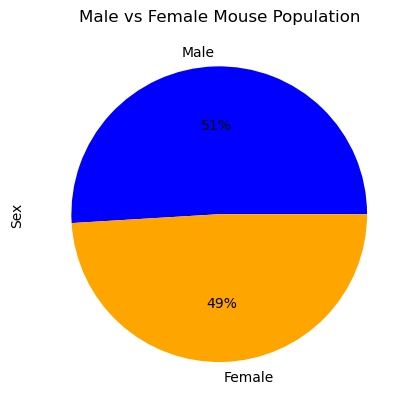

In [24]:
#  Generate a pie plot showing the distribution of female versus male mice using Pandas
data = cleaned_df['Sex'].value_counts()
pie_plot = data.plot.pie(autopct="%1.0f%%", startangle=0, title='Male vs Female Mouse Population', colors=['blue', 'orange'])
pie_plot.set_ylabel('Sex')

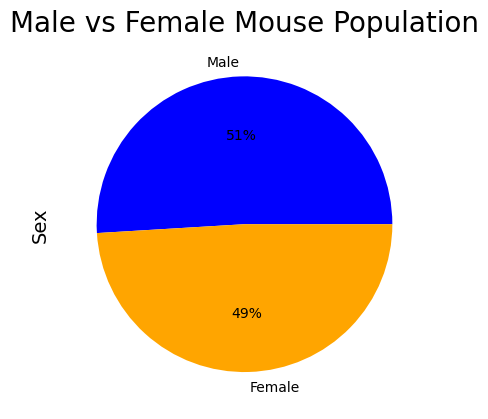

In [25]:
#  Generate a pie plot showing the distribution of female versus male mice using pyplot

pieplot = plt.figure(1)

# Create Labels for  sections 
labels = ["Male","Female"]

# List values of sections 
# data

# Set colors for each section of the pie
colors = ['blue', 'orange']

#Create the pie chart based upon the values 
plt.pie(data, labels=labels, colors=colors, autopct="%1.0f%%", startangle=0)
plt.title('Male vs Female Mouse Population',fontsize = 20)
plt.ylabel('Sex',fontsize = 14)
#Set equal axis

plt.show()

In [88]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


Capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# last_time_df = cleaned_df.groupby(["Mouse ID"]).max("Timepoint")
last_time_df = cleaned_df.groupby(["Mouse ID", "Drug Regimen"], as_index=False).max("Timepoint")

last_time_df.head(10)


,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,20,23,45,67.973419,2
1,a251,Infubinol,21,25,45,65.525743,1
2,a262,Placebo,17,29,45,70.717621,4
3,a275,Ceftamin,20,28,45,62.999356,3
4,a366,Stelasyn,16,29,30,63.440686,1
5,a401,Zoniferol,8,25,45,66.794156,4
6,a411,Ramicane,3,22,45,45.466677,1
7,a444,Ramicane,10,25,45,45.000000,0
8,a457,Ketapril,11,30,10,49.783419,0
9,a492,Stelasyn,20,25,45,60.122011,1


In [89]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# test = last_time_df[last_time_df["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]
# test.head()
for drug in drug_list:
    tmp = last_time_df[last_time_df["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
#     tmp = cleaned_df[cleaned_df["Drug Regimen"] == drug]["Tumor Volume (mm3)"]

    tumor_vol_data.append(tmp)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

# print outliers 
for didx in range(len(drug_list)):
    print("Drug: ", drug_list[didx])
    
    print("  Lower bound: ", tumor_vol_data[didx].min())
    print("  Upper bound: ", tumor_vol_data[didx].max())
    

Drug:  Capomulin
  Lower bound:  45.0
  Upper bound:  48.15820939
Drug:  Ramicane
  Lower bound:  45.0
  Upper bound:  47.62281636
Drug:  Infubinol
  Lower bound:  45.0
  Upper bound:  72.2267309
Drug:  Ceftamin
  Lower bound:  45.0
  Upper bound:  68.92318457


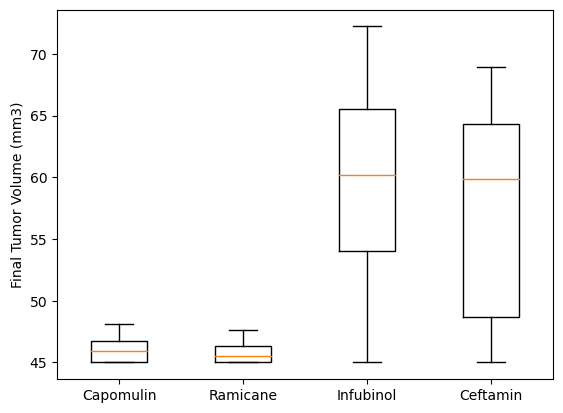

In [90]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

boxfig = plt.figure(2)

plt.boxplot(tumor_vol_data, labels=drug_list, flierprops={'color': 'r', 'marker': 'o'})
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

In [95]:
Capomulin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


Text(0, 0.5, 'Tumor Volume (mm3)')

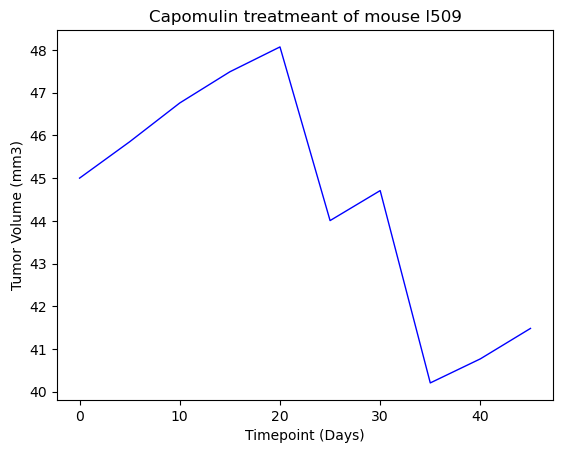

In [101]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_plot_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
line_plot_df.head()
x_axis = line_plot_df["Timepoint"]
y_axis = line_plot_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, y_axis, linewidth=1, color="b")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

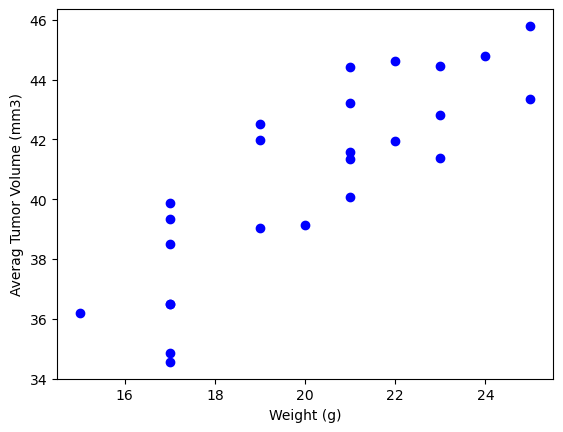

In [102]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots()
means = Capomulin_df.groupby(['Mouse ID']).mean()

marker_size = 8
plt.scatter(means['Weight (g)'], means['Tumor Volume (mm3)'], color="b")
plt.xlabel('Weight (g)',fontsize =10)
plt.ylabel('Averag Tumor Volume (mm3)')

In [122]:
# Calculate the correlation coefficient and linear regression model 
target = means[["Weight (g)", "Tumor Volume (mm3)"]]
correlation_coef = target.corr()
correlation_coef
# for mouse weight and average tumor volume for the Capomulin regimen

,Weight (g),Tumor Volume (mm3)
Weight (g),1.000000,0.841936
Tumor Volume (mm3),0.841936,1.000000


The correlation coefficient between mouse weight and the average tumor volume is  0.8419363424694719


Text(0, 0.5, 'Averag Tumor Volume (mm3)')

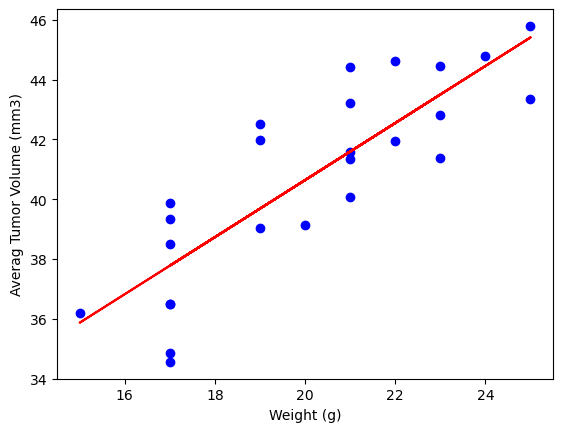

In [124]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(target["Weight (g)"], target["Tumor Volume (mm3)"])
regression = slope * target["Weight (g)"] + intercept

print('The correlation coefficient between mouse weight and the average tumor volume is ', correlation_coef.iloc[0,1])

fig1, ax1 = plt.subplots()
means = Capomulin_df.groupby(['Mouse ID']).mean()

marker_size = 8
plt.scatter(means['Weight (g)'], means['Tumor Volume (mm3)'], color="b")
plt.plot(target["Weight (g)"], regression, 'r')
plt.xlabel('Weight (g)',fontsize =10)
plt.ylabel('Averag Tumor Volume (mm3)')